<a href="https://colab.research.google.com/github/CoiferousYogi/BK-Birla_L-T_ML_Assignments/blob/main/L%26T_Assignment1_DataCleaningMasteryipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necessary libraries

In [693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for handling warnings which are not necessary
import warnings
warnings.filterwarnings("ignore")

# pandas options to show all the rows and columns
pd.set_option('display.max_columns', 32)
pd.set_option('display.max_rows', 100)

### Importing the file for pre-processing

In [694]:
data = pd.read_csv("hotel_bookings.csv")
df = pd.DataFrame(data)

### Analyzing the structure of the file

In [695]:
df.shape

(119390, 32)

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [697]:
df.head(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [698]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Creating a copy of the DataFrame

In [699]:
df1 = df.copy()
df1
# Now df1 contains all the values in df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### Understanding the structure and values of each column

In [700]:
# 1. hotel column
df1.hotel.value_counts()

,count
hotel,
City Hotel,79330
Resort Hotel,40060


In [701]:
# 2. is_canceled column
df1.is_canceled.value_counts(dropna=False)

,count
is_canceled,
0,75166
1,44224


In [702]:
# 3. lead_time
df1.lead_time.value_counts(dropna=False)

,count
lead_time,
0,6345
1,3460
2,2069
3,1816
4,1715
...,...
400,1
370,1
532,1


In [703]:
# 4. arrival_date_year
df1.arrival_date_year.value_counts(dropna=False)
df1.arrival_date_year.value_counts(dropna=True)

,count
arrival_date_year,
2016,56707
2017,40687
2015,21996


In [704]:
# 5. arrival_date_month
df1.arrival_date_month.value_counts(dropna=False)

,count
arrival_date_month,
August,13877
July,12661
May,11791
October,11160
April,11089
June,10939
September,10508
March,9794
February,8068


In [705]:
# 6. arrival_date_week_number
df1.arrival_date_week_number.value_counts(dropna=False)

,count
arrival_date_week_number,
33,3580
30,3087
32,3045
34,3040
18,2926
21,2854
28,2853
17,2805
20,2785


In [706]:
# 7. arrival_date_day_of_month
df1.arrival_date_day_of_month.value_counts(dropna=False)

,count
arrival_date_day_of_month,
17,4406
5,4317
15,4196
25,4160
26,4147
9,4096
12,4087
16,4078
2,4055


In [707]:
# 8. stays_in_weekend_nights
df1.stays_in_weekend_nights.value_counts(dropna=False)

,count
stays_in_weekend_nights,
0,51998
2,33308
1,30626
4,1855
3,1259
6,153
5,79
8,60
7,19


In [708]:
# 9. stays_in_week_nights
df1.stays_in_week_nights.value_counts(dropna=False)

,count
stays_in_week_nights,
2,33684
1,30310
3,22258
5,11077
4,9563
0,7645
6,1499
10,1036
7,1029


In [709]:
# 10. adults
df1.adults.value_counts(dropna=False)

,count
adults,
2,89680
1,23027
3,6202
0,403
4,62
26,5
27,2
20,2
5,2


In [710]:
# 11. children
df1.children.value_counts(dropna=False)

,count
children,
0.0,110796
1.0,4861
2.0,3652
3.0,76
NaN,4
10.0,1


In [711]:
# 12. babies
df1.babies.value_counts(dropna=False)

,count
babies,
0,118473
1,900
2,15
10,1
9,1


In [712]:
# 13. meal
df1.meal.value_counts(dropna=False)

,count
meal,
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798


In [713]:
# 14. country
df1.country.value_counts(dropna=False)

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
DJI,1
BWA,1
HND,1


In [714]:
# 15. market_segment
df1.market_segment.value_counts(dropna=False)

,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


In [715]:
# 16. distribution_channel
df1.distribution_channel.value_counts(dropna=False)

,count
distribution_channel,
TA/TO,97870
Direct,14645
Corporate,6677
GDS,193
Undefined,5


In [716]:
# 17. is_repeated_guest
df1.is_repeated_guest.value_counts(dropna=False)

,count
is_repeated_guest,
0,115580
1,3810


In [717]:
# 18. previous_cancellations
df1.previous_cancellations.value_counts(dropna=False)

,count
previous_cancellations,
0,112906
1,6051
2,116
3,65
24,48
11,35
4,31
26,26
25,25


In [718]:
# 19. previous_bookings_not_canceled
df1.previous_bookings_not_canceled.value_counts(dropna=False)

,count
previous_bookings_not_canceled,
0,115770
1,1542
2,580
3,333
4,229
5,181
6,115
7,88
8,70


In [719]:
# 20. reserved_room_type
df1.reserved_room_type.value_counts(dropna=False)

,count
reserved_room_type,
A,85994
D,19201
E,6535
F,2897
G,2094
B,1118
C,932
H,601
P,12


In [720]:
# 21. assigned_room_type
df1.assigned_room_type.value_counts(dropna=False)

,count
assigned_room_type,
A,74053
D,25322
E,7806
F,3751
G,2553
C,2375
B,2163
H,712
I,363


In [721]:
# 22. booking_changes
df1.booking_changes.value_counts(dropna=False)

,count
booking_changes,
0,101314
1,12701
2,3805
3,927
4,376
5,118
6,63
7,31
8,17


In [722]:
# 23. deposit_type
df1.deposit_type.value_counts(dropna=False)

,count
deposit_type,
No Deposit,104641
Non Refund,14587
Refundable,162


In [723]:
# 24. agent
df1.agent.value_counts(dropna=False)

,count
agent,
9.0,31961
NaN,16340
240.0,13922
1.0,7191
14.0,3640
...,...
280.0,1
285.0,1
289.0,1


In [724]:
# 25. company
df1.company.value_counts(dropna=False)

,count
company,
NaN,112593
40.0,927
223.0,784
67.0,267
45.0,250
...,...
32.0,1
11.0,1
487.0,1


In [725]:
# 26. days_in_waiting_list
df1.days_in_waiting_list.value_counts(dropna=False)

,count
days_in_waiting_list,
0,115692
39,227
58,164
44,141
31,127
...,...
116,1
109,1
37,1


In [726]:
# 27. customer_type
df1.customer_type.value_counts(dropna=False)

,count
customer_type,
Transient,89613
Transient-Party,25124
Contract,4076
Group,577


In [727]:
# 28. adr
df1.adr.value_counts(dropna=False)

,count
adr,
62.00,3754
75.00,2715
90.00,2473
65.00,2418
0.00,1959
...,...
89.43,1
63.07,1
55.69,1


In [728]:
# 29. required_car_parking_spaces
df1.required_car_parking_spaces.value_counts(dropna=False)

,count
required_car_parking_spaces,
0,111974
1,7383
2,28
3,3
8,2


In [729]:
# 30. total_of_special_requests
df1.total_of_special_requests.value_counts(dropna=False)

,count
total_of_special_requests,
0,70318
1,33226
2,12969
3,2497
4,340
5,40


In [730]:
# 31. reservation_status
df1.reservation_status.value_counts(dropna=False)

,count
reservation_status,
Check-Out,75166
Canceled,43017
No-Show,1207


In [731]:
# 32. reservation_status_date
df1.reservation_status_date.value_counts(dropna=False)
df1.reservation_status_date.isnull().sum()

0

In [732]:
df1.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


## Data Pre-processing

#### Making a heatmap according to correlation coefficients to gauge the importance of variables

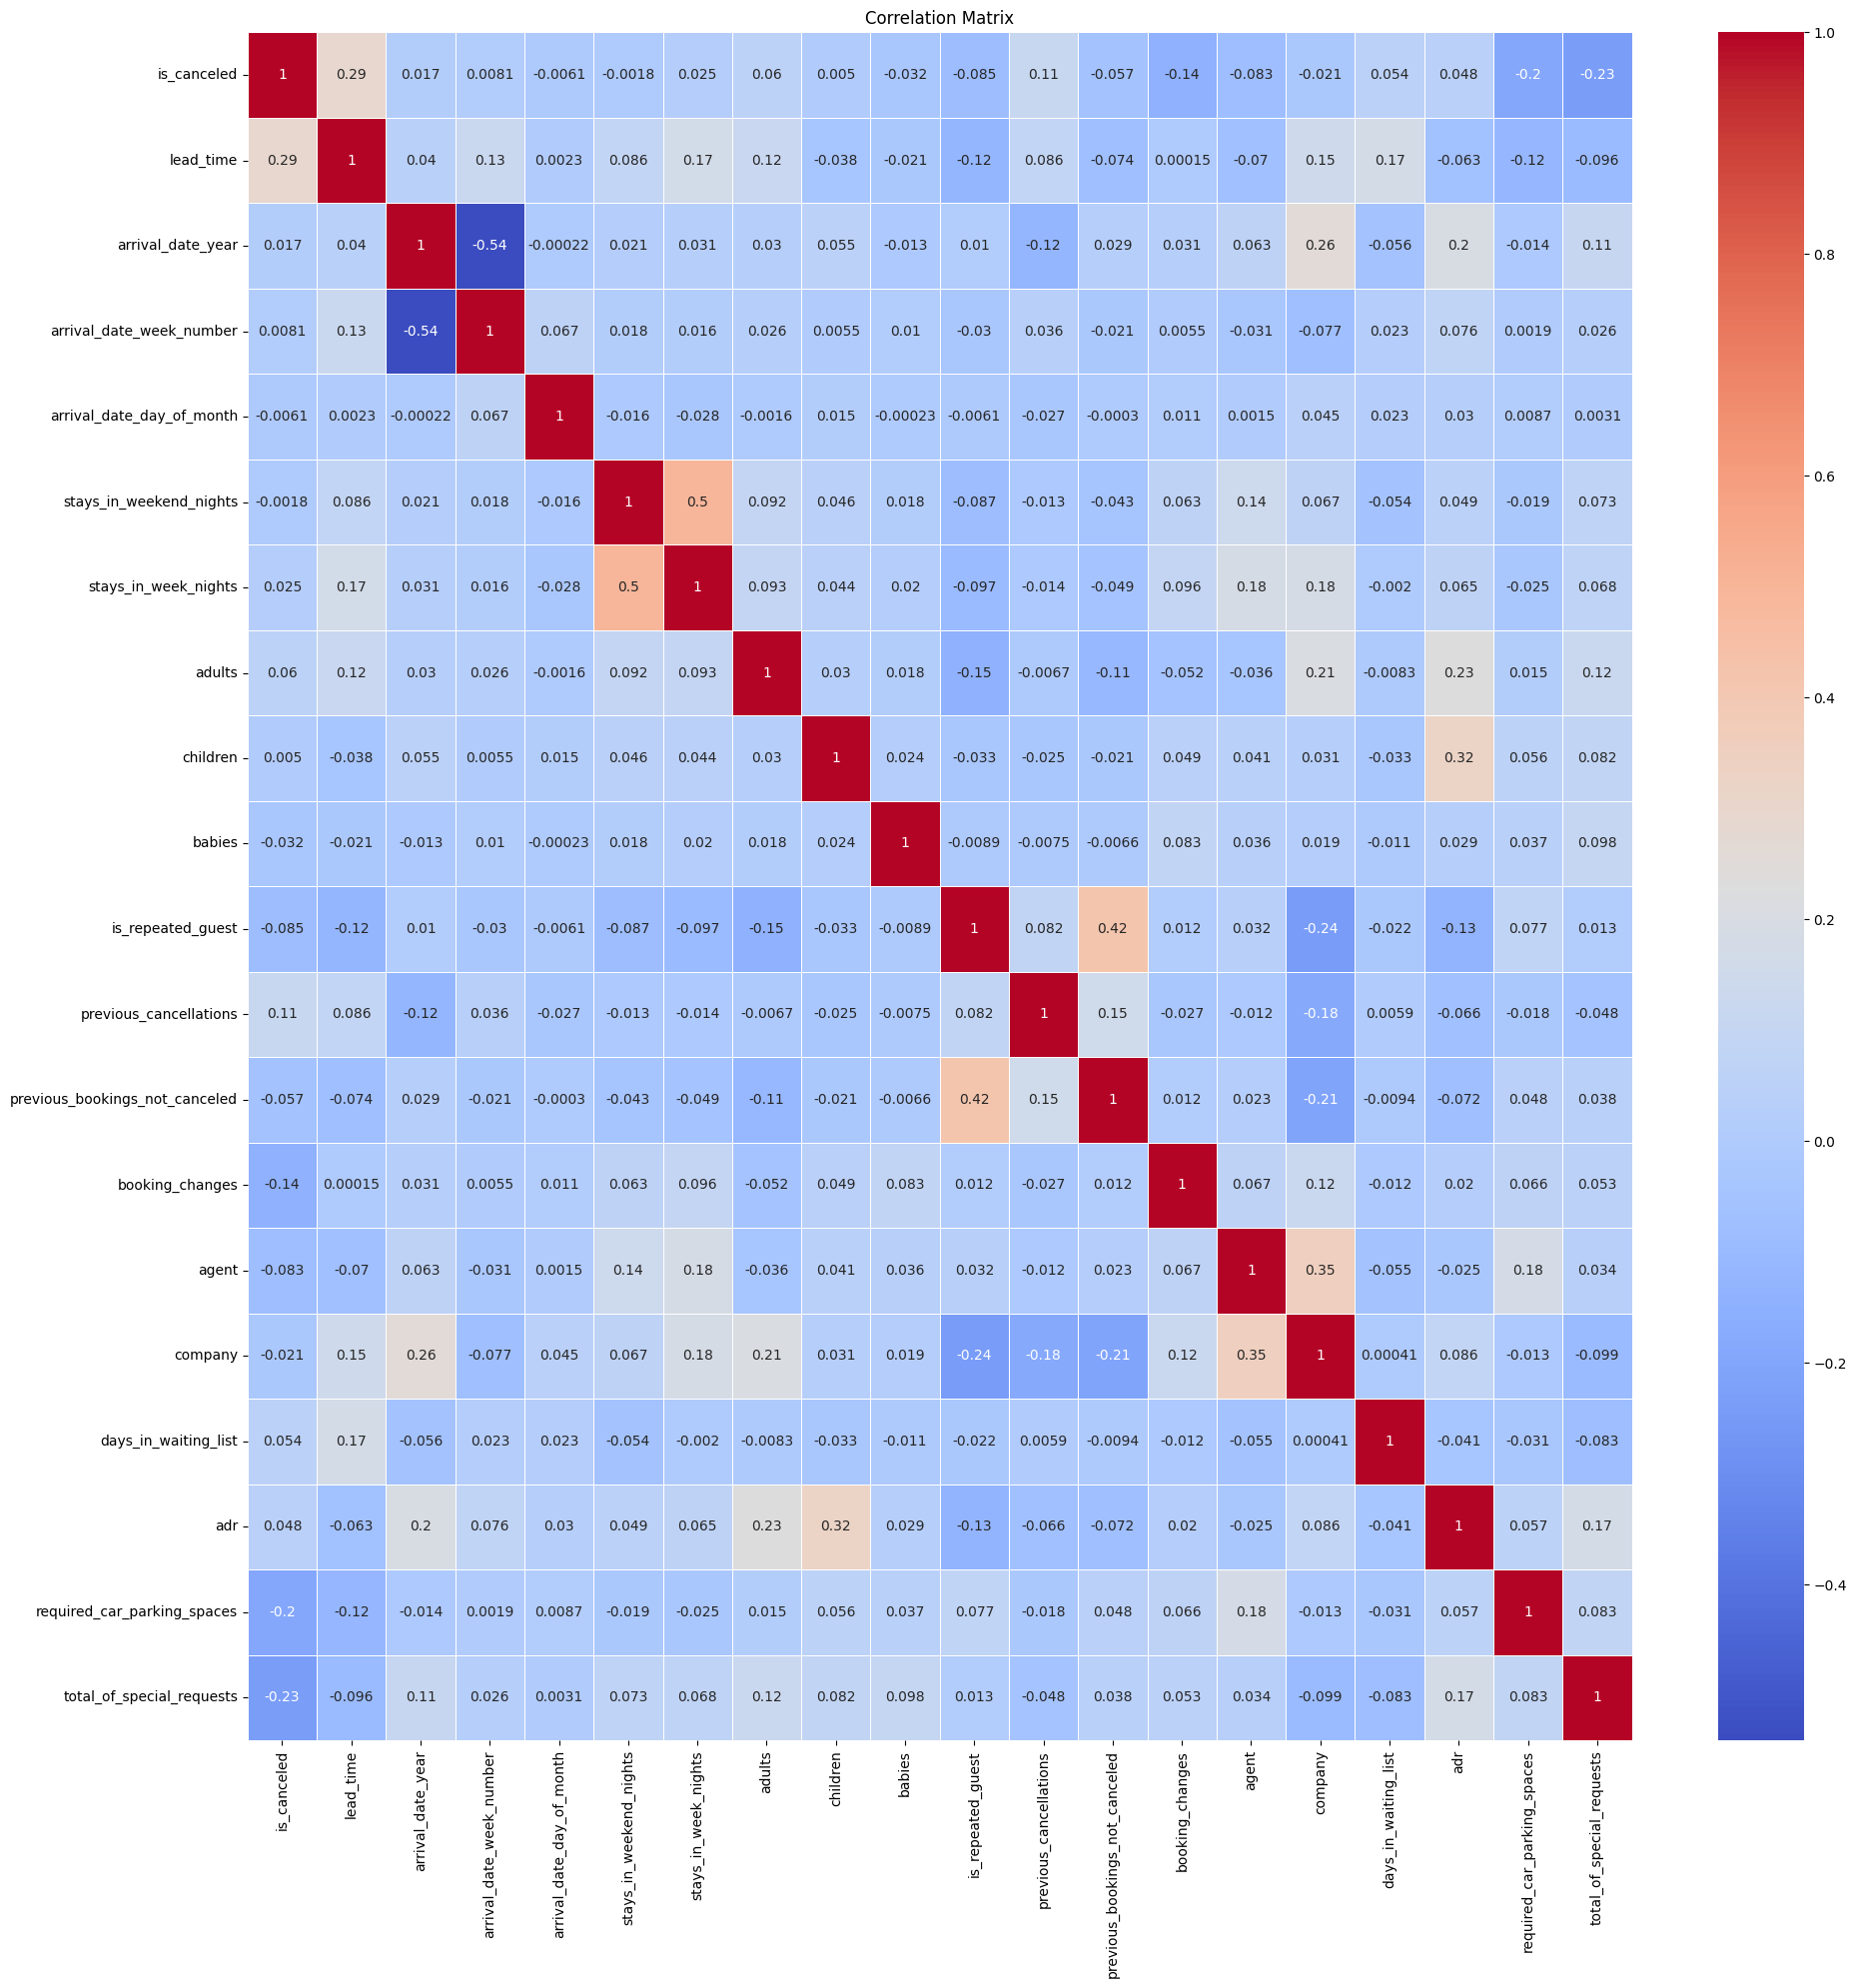

In [733]:
plt.figure(figsize=(20,20))
numerical_df = df1.select_dtypes(exclude='object')
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
plt.savefig('correlation_matrix_numerical_vars_heatmap.png')
plt.close()

### 1. Data Cleaning

#### a. Handling Duplicate Values

##### i. Removing Rows with duplicate values

In [734]:
df1.shape

(119390, 32)

In [735]:
# understanding how many rows have been duplicated
df1[df1.duplicated()].shape

(31994, 32)

In [736]:
df1[df1.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [737]:
# dropping the duplicates
df1.drop_duplicates(inplace=True)
df1.shape

(87396, 32)

#### b. Handling Missing Values

In [738]:
df1.isnull().sum().sort_values(ascending=False)

,0
company,82137
agent,12193
country,452
children,4
reserved_room_type,0
assigned_room_type,0
booking_changes,0
deposit_type,0
hotel,0
previous_cancellations,0


Since company and agent columns have null values, there may be cases where the customer did not book the hotel through any agent or company. In such cases, since both the columns contain numerical values, the null values can be replaced with 0.

In [739]:
df1.company.fillna(0, inplace=True)

In [740]:
df1.agent.fillna(0, inplace=True)

In [741]:
df1.isnull().sum().sort_values(ascending=False)

,0
country,452
children,4
hotel,0
agent,0
reserved_room_type,0
assigned_room_type,0
booking_changes,0
deposit_type,0
company,0
previous_cancellations,0


In [742]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [743]:
# number of unique values and their counts in the county column
df1.country.value_counts(dropna=False)

,count
country,
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
...,...
MMR,1
BFA,1
CYM,1


Now the columns with the highest missing values are the Country and Children.

With the country column, there are 452 entries which have the missing country name. The total number of entries we have is 87,396 and 453 is 0.517% of the total number of entries. We cannot use mean, median or mode in this case as it would make no sense. We can use a default value such as 'Others' or 'OTH' to denote such entries but it would still not give us any useful insights into the data. Hence it would be better to perform some tests to see if the country variable has any significant impact on the result or the distribution of data or if it shows any strong correlation with any other variable(categorical or numerical)

**Chi-Square test to compare categorical variables**

---



<Axes: xlabel='country', ylabel='count'>

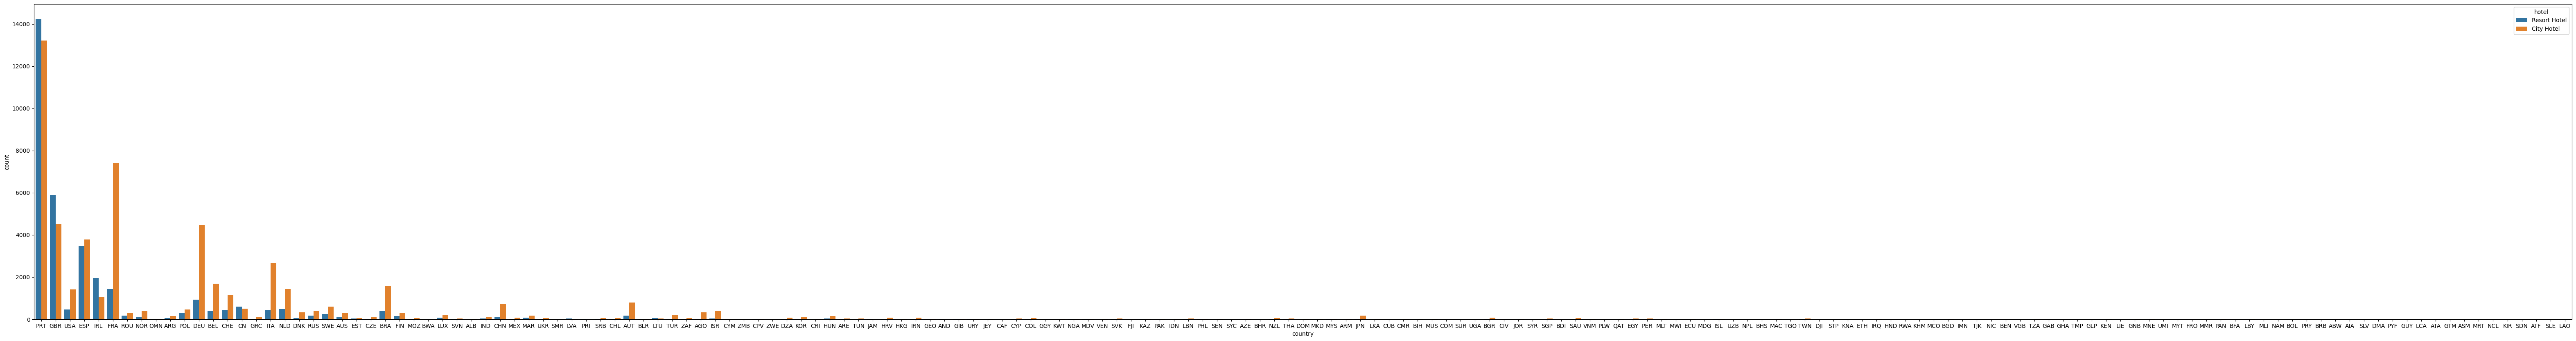

In [744]:
# plot to check distribution of hotels vs country
plt.figure(figsize=(80,10))
sns.countplot(x='country', hue='hotel', data=df1)

In [745]:
# chi-square test to compare country with other categorical variables

# 1. country and hotel
df2 = df1.copy()
contingency_table = pd.crosstab(df2['country'], df2['hotel'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)
# p-value for country and hotel comparison is 0 which is less than 0.05 => strong correlation

Chi-square statistic: 11416.329752783353
p-value: 0.0


In [746]:
# 2. country and meal
contingency_table = pd.crosstab(df2['country'], df2['meal'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)
# p-value for country and meal comparison is 0 which is less than 0.05 => strong correlation

Chi-square statistic: 4648.246321569381
p-value: 0.0


**From the above tests, it is quite clear that country variable influences quite a few other variables as well. Hence dropping the missing values might introduce a bias in the dataset. Hence we will proceed with filling up the missing values using a default value 'OTH'**

In [747]:
df1.country.fillna('OTH', inplace=True)

In [748]:
df1.isnull().sum().sort_values(ascending=False)

,0
children,4
hotel,0
previous_cancellations,0
reservation_status,0
total_of_special_requests,0
required_car_parking_spaces,0
adr,0
customer_type,0
days_in_waiting_list,0
company,0


#####For children variable, it is better to replace the missing values with 0

In [749]:
df1.children.fillna(0, inplace=True)

In [750]:
df1.children.value_counts(dropna=False)

,count
children,
0.0,79032
1.0,4695
2.0,3593
3.0,75
10.0,1


In [751]:
df1.isnull().sum().sort_values(ascending=False)

,0
hotel,0
is_canceled,0
reservation_status,0
total_of_special_requests,0
required_car_parking_spaces,0
adr,0
customer_type,0
days_in_waiting_list,0
company,0
agent,0


**There are some rows for which the value of meal is Undefined. We handle such rows by replacing that value with OTH which stands for Other**

In [752]:
df1.meal.value_counts(dropna=False)

,count
meal,
BB,67978
SC,9481
HB,9085
Undefined,492
FB,360


In [753]:
df1.meal.replace('Undefined', 'OTH', inplace=True)

In [754]:
df1[(df1.adults + df1.children + df1.babies) == 0].shape

(166, 32)

**There are some rows where the sum of adults, children and babies are 0. Since it is not logically possible, we drop such rows**

In [755]:
df1.drop(df1[(df1.adults + df1.children + df1.babies) == 0].index, inplace=True)

In [756]:
df1.shape

(87230, 32)

#### All missing values have been handled

### Detecting and Handling Outliers

In [757]:
# Using interquartile range

def detect_outliers_iqr(df1, column):
    # Use the input dataframe (df1) for quantile calculation instead of the global 'data'
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


detect_outliers_iqr(df1, 'adr')
detect_outliers_iqr(df1,'adults')
detect_outliers_iqr(df1,'children')
detect_outliers_iqr(df1,'babies')

(               hotel  is_canceled  lead_time  arrival_date_year  \
 109     Resort Hotel            0        102               2015   
 111     Resort Hotel            0         78               2015   
 165     Resort Hotel            0         84               2015   
 236     Resort Hotel            0         78               2015   
 264     Resort Hotel            0         21               2015   
 ...              ...          ...        ...                ...   
 118437    City Hotel            0          0               2017   
 118571    City Hotel            0        101               2017   
 118794    City Hotel            0        109               2017   
 119098    City Hotel            0         16               2017   
 119106    City Hotel            0          0               2017   
 
        arrival_date_month  arrival_date_week_number  \
 109                  July                        27   
 111                  July                        27   
 165          

It would be better to consider all the entries lying below 1% and above 99% distribution as outliers

In [758]:
def cap_outliers(series, lower_percentile=1, upper_percentile=99):
    lower_bound = series.quantile(lower_percentile / 100)
    upper_bound = series.quantile(upper_percentile / 100)
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in ['adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr']:
    df[col] = cap_outliers(df1[col])


In [759]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [760]:
df1.shape

(87230, 32)

### Converting columns into appropriate data types

In [761]:
df1.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


i. Converting columns of children, agent and company from float to int

In [762]:
df1[['children', 'agent', 'company']] = df1[['children', 'agent', 'company']].astype('int64')

In [763]:
df1.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


ii. Converting the column of 'reservation_status_date' to datetime

In [764]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [765]:
df1.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


### Feature Engineering

#### Adding important columns

**Adding total people as column. Total people = adults + children + babies**

In [766]:
df1["total_people"] = (df1.adults + df1.children + df1.babies)

**Adding total stay days as column
total_stay_days = stays_in_week_nights + stays_in_weekend_nights**

In [767]:
df1["total_stay_days"] = (df1.stays_in_week_nights + df1.stays_in_weekend_nights)

In [768]:
df1.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay_days
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,...,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,...,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,...,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,...,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


#### The dataset has been cleaned and it is ready for analysis

In [769]:
df_cleaned = df1.copy()

In [784]:
df_cleaned.shape

(119390, 32)

In [782]:
df_cleaned.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,87230.000000,119390.000000,87230.000000,119390.000000,87230.000000,87230.000000,119390.000000,119390.000000,119390.000000,87230.0,87230.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.877210,0.100787,0.010478,0.031912,0.019271,0.104872,0.221124,74.828319,10.775157,0.0,106.136399,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.0,72.250000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.0,98.200000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.0,134.100000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,3.000000,2.000000,1.000000,1.000000,1.000000,5.000000,21.000000,535.000000,543.000000,0.0,261.585697,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.495515,0.389991,0.101825,0.175767,0.137476,0.610307,0.652306,107.141953,53.943884,0.0,50.710622,0.245291,0.792798,NaN


In [783]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          87230 non-null   float64       
 10  children                        119390 non-null  float64

In [785]:
df_cleaned.head(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0,0.0,0.0,C,C,3,No Deposit,0.0,0.0,0.0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0,0.0,0.0,C,C,4,No Deposit,0.0,0.0,0.0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,Direct,0,0.0,0.0,A,C,0,No Deposit,0.0,0.0,0.0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Corporate,Corporate,0,0.0,0.0,A,A,0,No Deposit,304.0,0.0,0.0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0,0.0,0.0,A,A,0,No Deposit,240.0,0.0,0.0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,NaN,0.0,NaN,BB,GBR,Online TA,TA/TO,0,NaN,NaN,A,A,0,No Deposit,240.0,0.0,NaN,Transient,NaN,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,Direct,0,0.0,0.0,C,C,0,No Deposit,0.0,0.0,0.0,Transient,107.0,0,0,Check-Out,2015-07-03


## **Data Analysis**

,avg_adr,avg_stay,cancellation_rate
hotel,,,
City Hotel,111.068603,2.182957,0.417270
Resort Hotel,98.398201,3.128732,0.277634


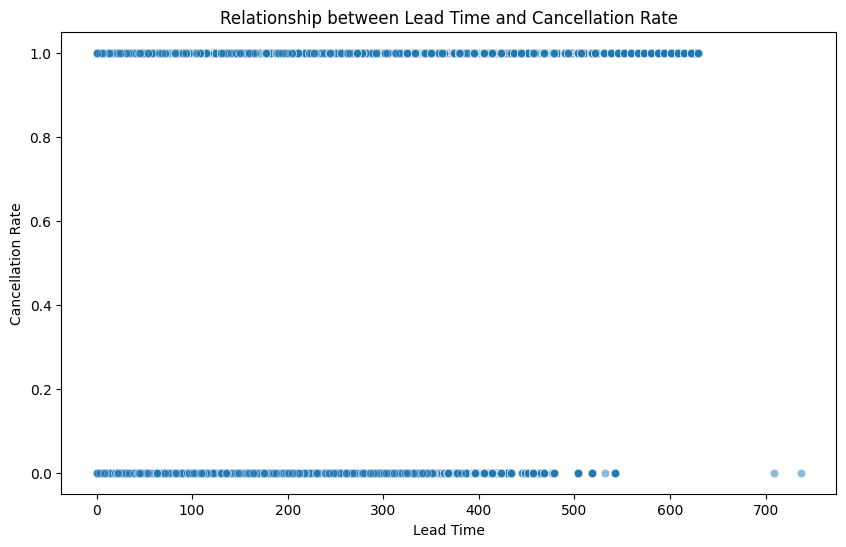

Correlation between Lead Time and Cancellation Rate: 0.293123355760716


In [786]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze booking distribution across hotel types
hotel_metrics = df_cleaned.groupby('hotel').agg(
    avg_adr=('adr', 'mean'),
    avg_stay=('stays_in_week_nights', 'mean'),
    cancellation_rate=('is_canceled', 'mean')
)
display(hotel_metrics)

# 2. Investigate the relationship between lead time and cancellation rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='is_canceled', data=df_cleaned, alpha=0.5)
plt.title('Relationship between Lead Time and Cancellation Rate')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.show()

correlation = df_cleaned['lead_time'].corr(df_cleaned['is_canceled'])
print(f"Correlation between Lead Time and Cancellation Rate: {correlation}")

In [789]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay_days','total_people']]

<Axes: >

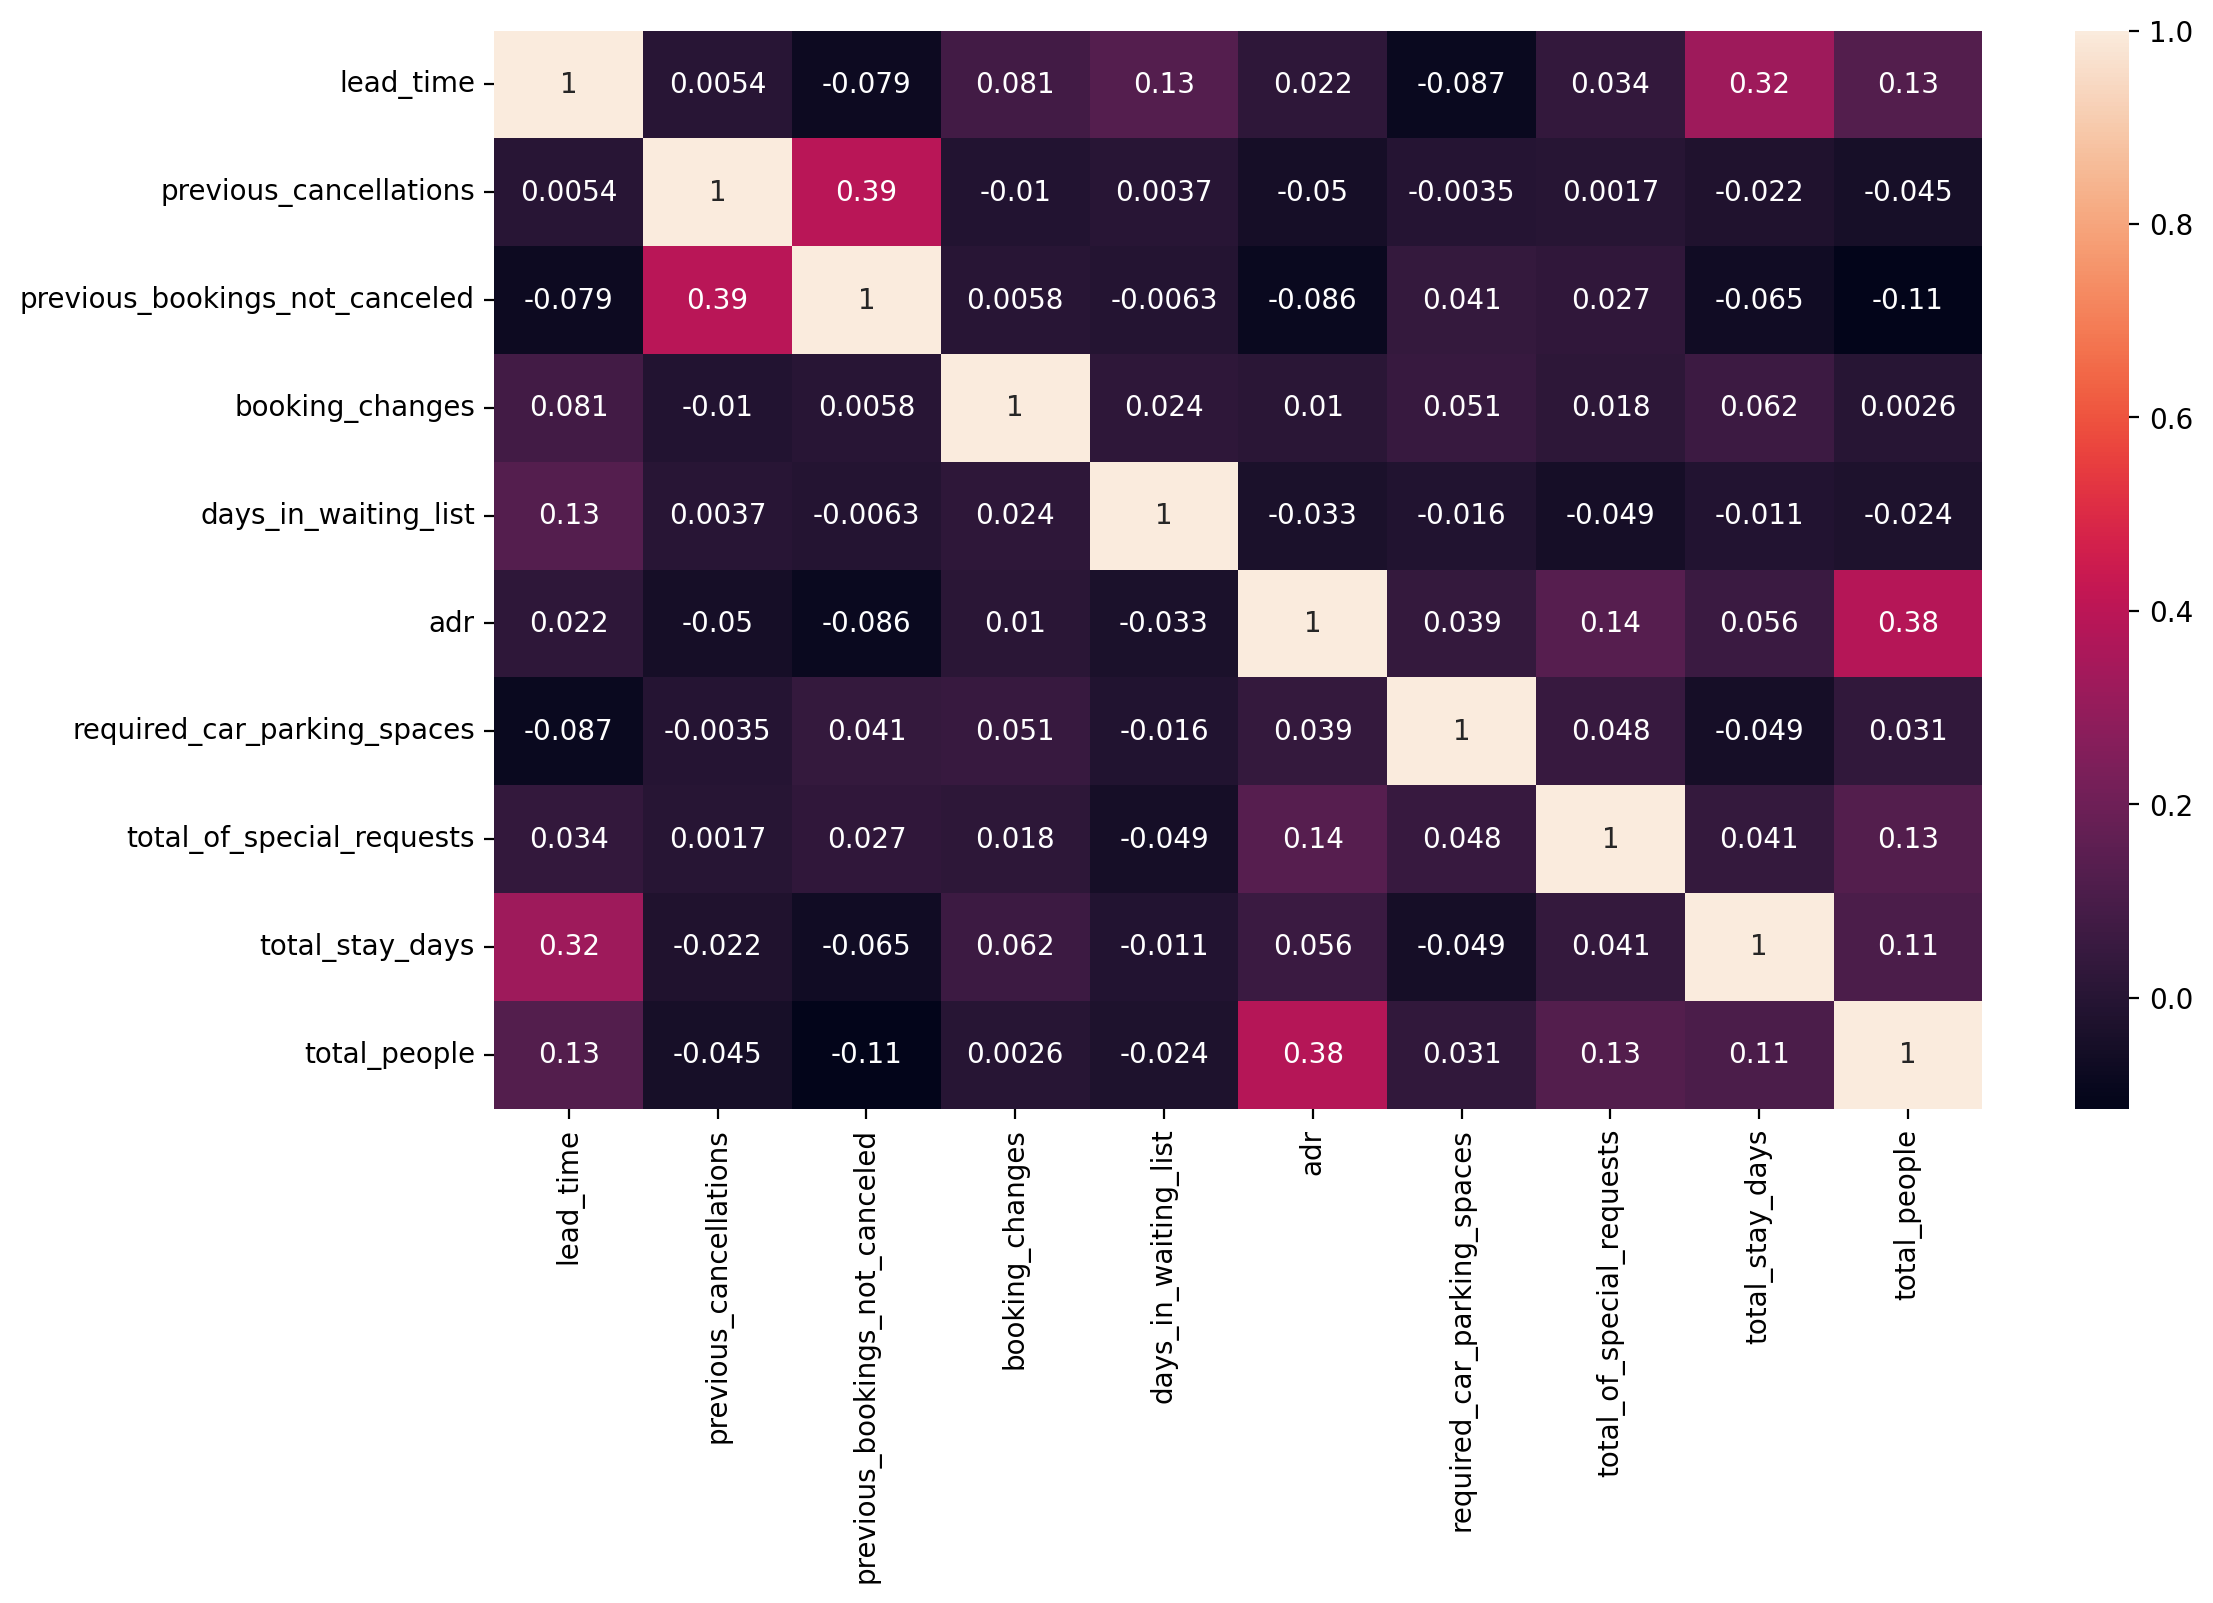

In [790]:
plt.figure(figsize = (12,7), dpi = 200)
sns.heatmap(num_df1.corr(), annot=True)

We can see the following observations:

<ol>
<li>There is a weak positive correlation between total_people and adr(average daily rate). This makes sense as more number of people means greater revenue</li>
<li>There is a weak positive correlation between total_stay and lead_time. It makes some sense as people who are planning to stay for a long time tend to book well in advance.</li>
<li>Same is the case with the correlation between total_people and adr. Since people who are in big groups also tend to book in advance. This relationship also shows a weak positive correlation.</li>
</ol>


**Reasoning**:
Explore the impact of customer types and market segments on booking patterns, analyze ADR and length of stay, and visualize the findings.



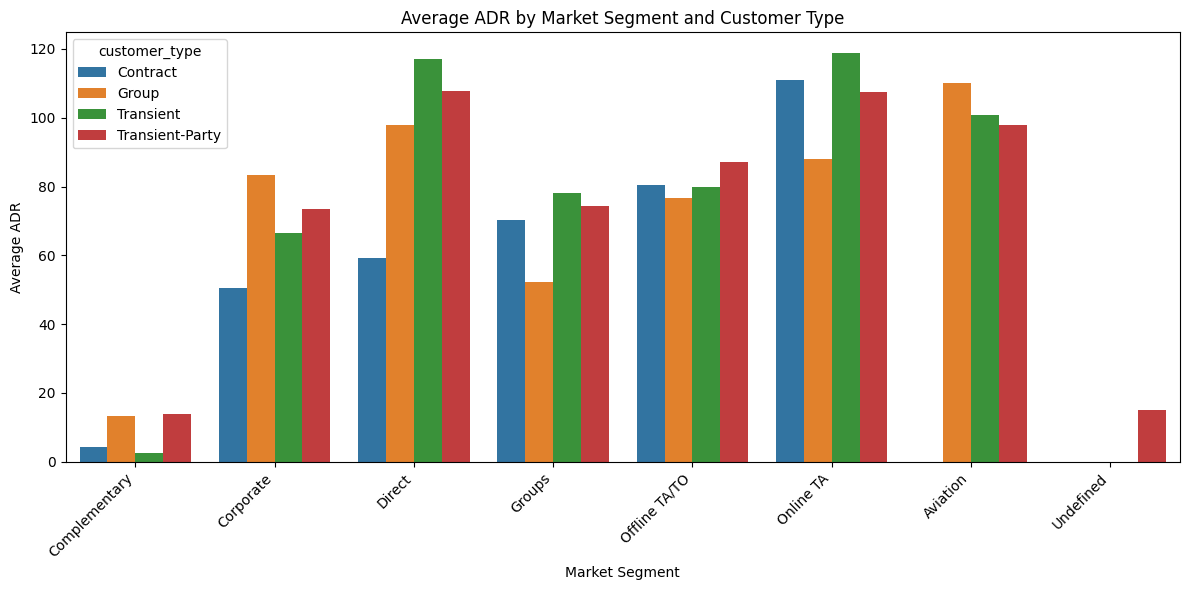

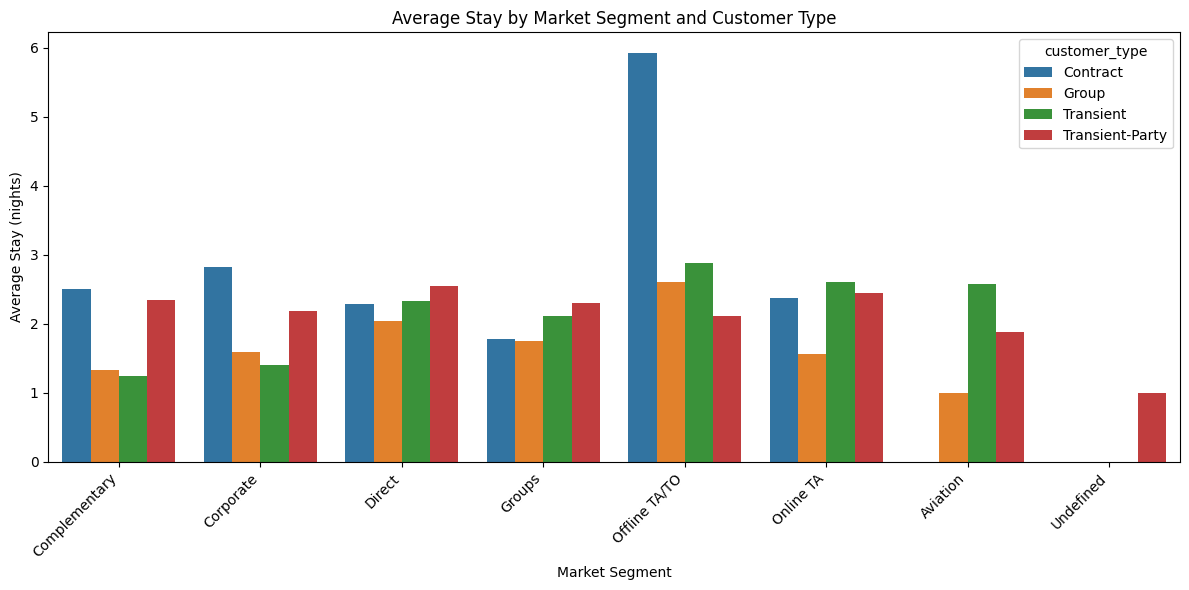

deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: is_canceled, dtype: float64

Correlation between deposit type and cancellation rate: 0.46863382370883544


In [787]:
# 3. Explore the impact of customer types and market segments
customer_segment_metrics = df_cleaned.groupby(['customer_type', 'market_segment']).agg(
    avg_adr=('adr', 'mean'),
    avg_stay=('stays_in_week_nights', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='avg_adr', hue='customer_type', data=customer_segment_metrics)
plt.title('Average ADR by Market Segment and Customer Type')
plt.xlabel('Market Segment')
plt.ylabel('Average ADR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='avg_stay', hue='customer_type', data=customer_segment_metrics)
plt.title('Average Stay by Market Segment and Customer Type')
plt.xlabel('Market Segment')
plt.ylabel('Average Stay (nights)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Analyze the effect of deposit type on cancellation rate
deposit_cancellation = df_cleaned.groupby('deposit_type')['is_canceled'].mean()
print(deposit_cancellation)
correlation_deposit = df_cleaned['is_canceled'].corr(df_cleaned['deposit_type'].astype('category').cat.codes)
print(f"\nCorrelation between deposit type and cancellation rate: {correlation_deposit}")

## Data visualization

<Figure size 1200x600 with 0 Axes>

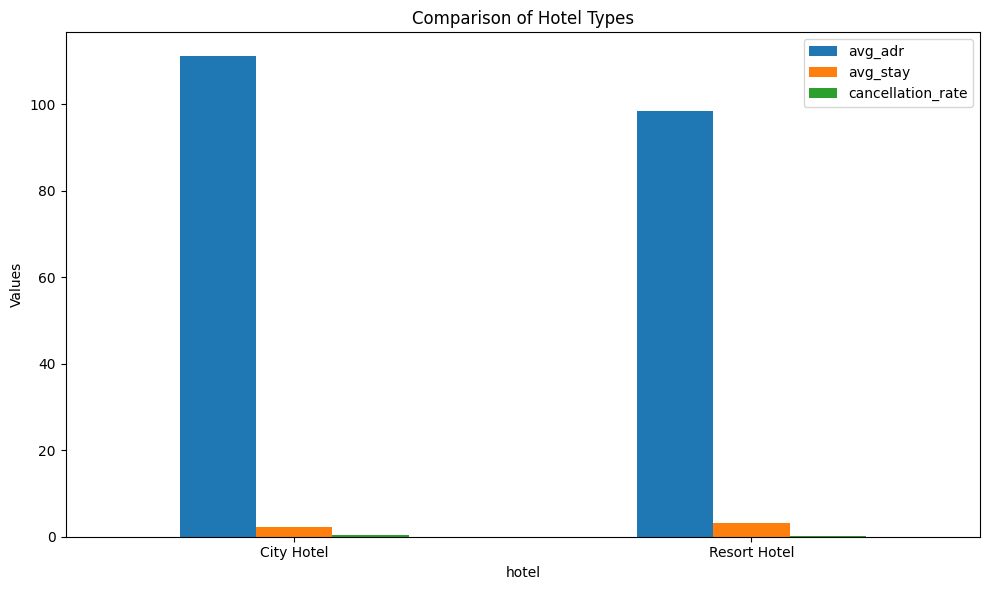

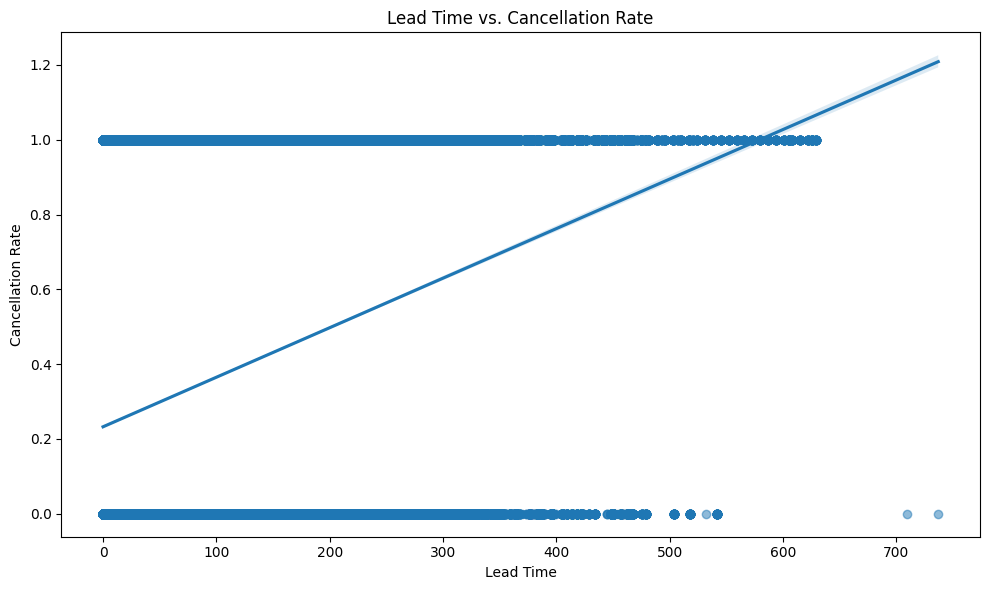

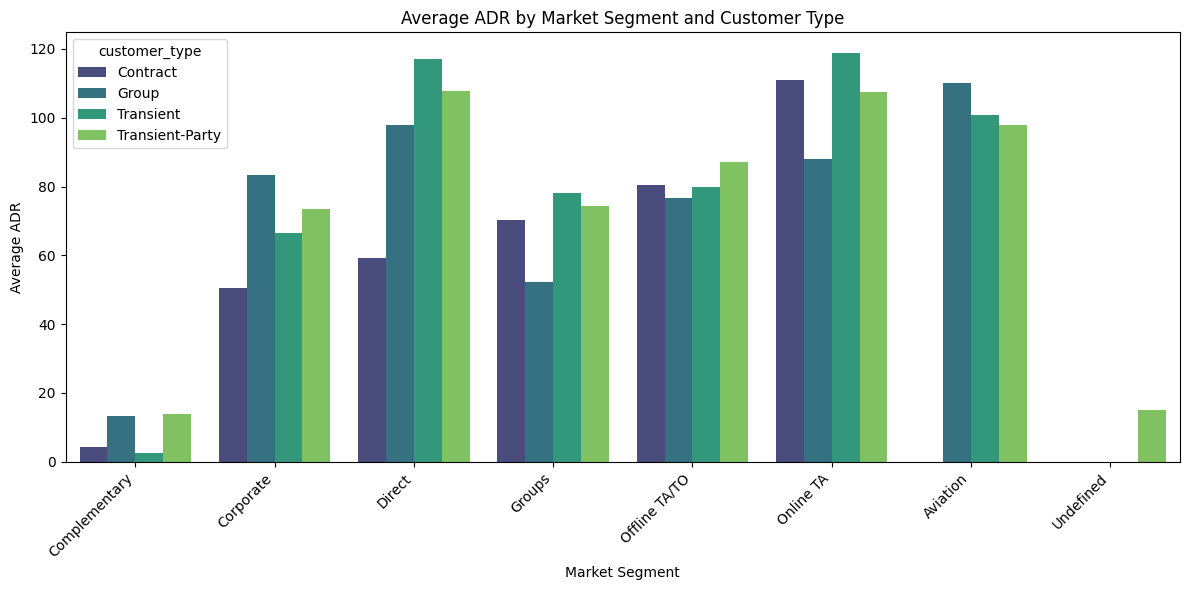

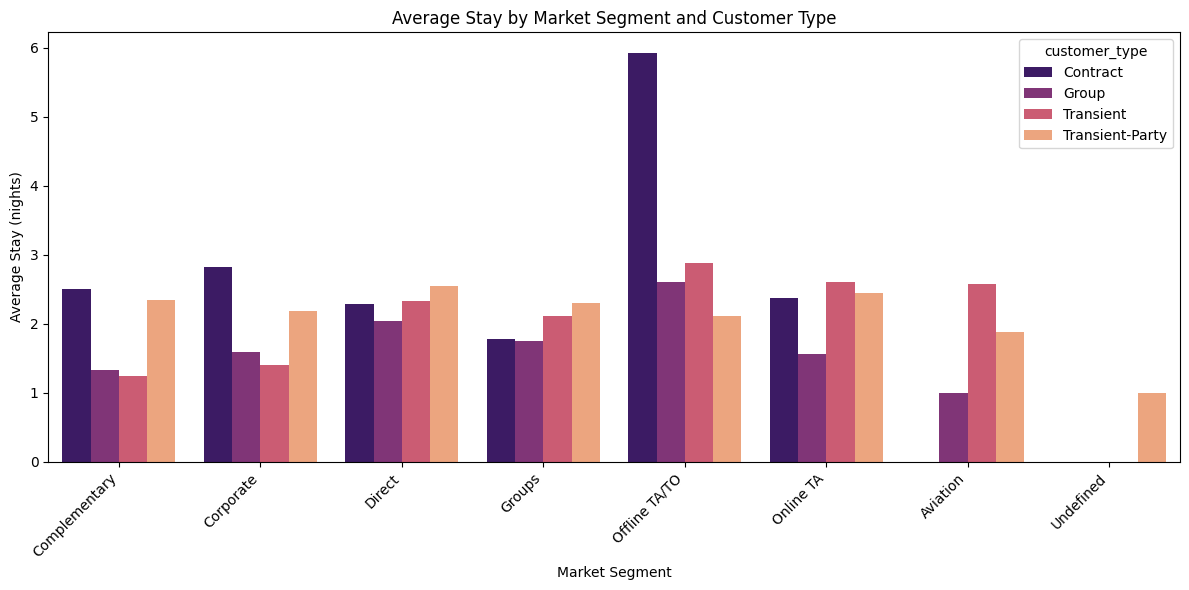

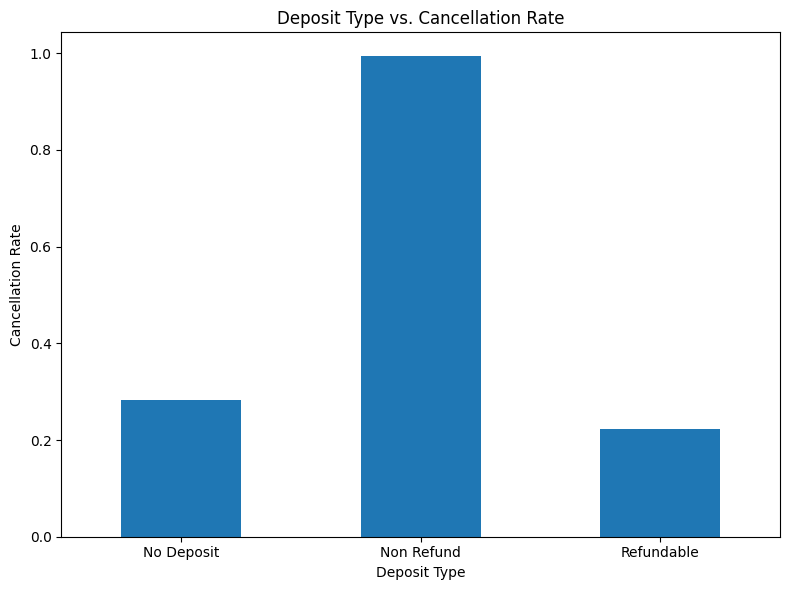

In [774]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Hotel Type Comparison
plt.figure(figsize=(12, 6))
hotel_metrics = df_cleaned.groupby('hotel').agg(
    avg_adr=('adr', 'mean'),
    avg_stay=('stays_in_week_nights', 'mean'),
    cancellation_rate=('is_canceled', 'mean')
)

hotel_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Hotel Types')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('hotel_type_comparison.png')
plt.show()


# 2. Lead Time vs. Cancellation Rate
plt.figure(figsize=(10, 6))
sns.regplot(x='lead_time', y='is_canceled', data=df_cleaned, scatter_kws={'alpha':0.5})
plt.title('Lead Time vs. Cancellation Rate')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.savefig('lead_time_vs_cancellation.png')
plt.show()


# 3. Customer Segments and Market Segments
customer_segment_metrics = df_cleaned.groupby(['customer_type', 'market_segment']).agg(
    avg_adr=('adr', 'mean'),
    avg_stay=('stays_in_week_nights', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='avg_adr', hue='customer_type', data=customer_segment_metrics, palette='viridis')
plt.title('Average ADR by Market Segment and Customer Type')
plt.xlabel('Market Segment')
plt.ylabel('Average ADR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('adr_by_segment.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='market_segment', y='avg_stay', hue='customer_type', data=customer_segment_metrics, palette='magma')
plt.title('Average Stay by Market Segment and Customer Type')
plt.xlabel('Market Segment')
plt.ylabel('Average Stay (nights)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('stay_by_segment.png')
plt.show()


# 4. Deposit Type and Cancellation Rate
plt.figure(figsize=(8, 6))
deposit_cancellation = df_cleaned.groupby('deposit_type')['is_canceled'].mean()
deposit_cancellation.plot(kind='bar')
plt.title('Deposit Type vs. Cancellation Rate')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('deposit_vs_cancellation.png')
plt.show()

## Summary:


### Data Analysis Key Findings

* **Hotel Type Differences:** City Hotels have a higher average daily rate (ADR) and a higher cancellation rate (41.7%) compared to Resort Hotels.  Resort Hotels have a lower cancellation rate (27.8%).
* **Lead Time and Cancellations:** A positive correlation (0.293) exists between lead time and cancellation rate.  Longer lead times tend to have slightly higher cancellation rates.
* **Customer Segments Impact:**  Different customer types and market segments exhibit varying ADR and average length of stay.  The visualizations produced by the code would allow the user to identify high-value segments.
* **Deposit Type's Influence:** Non-Refund deposits have a very high cancellation rate (99.4%), significantly higher than No Deposit and Refundable deposits, which show a correlation of 0.469 with the cancellation rate.


### Insights or Next Steps

* **Targeted Marketing and Pricing:** Investigate the high-cancellation segments (e.g., Non-Refund deposits, long lead times) and consider adjusting pricing strategies, marketing campaigns, or cancellation policies to reduce cancellations.  Further investigation of the highest value customer segments would also be beneficial.
* **Predictive Modeling:** Build a predictive model to forecast cancellations based on factors such as lead time, deposit type, customer type, and market segment. This could enhance revenue management and resource allocation.
